# 기말프로젝트 대상


## Dataset
#### URL: https://github.com/sungminju7488/DGU-MLDL
성민주학우님의 프로젝트 데이터를 사용하였습니다.
#### URL: https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset




#### 데이터셋 소개

StreetEasy는 뉴욕시의 주요 부동산 시장으로 맨하탄에 있는 5,000개의 임대 매물 목록을 포함한 데이터셋
StreetEasy is New York City’s leading real estate marketplace. You will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan.

#### 데이터셋 칼럼

It has the following columns:

rental_id: 임대 매물 ID
rent: 임대료
bedrooms: 침실 수
bathrooms: 욕실 수
size_sqft: 평방 피트(면적)
min_to_subway: 지하철까지의 최소 거리(분)
floor: 층
building_age_yrs: 건물 연식(년)
no_fee: 수수료 없음 여부
has_roofdeck: 옥상 데크 여부
has_washer_dryer: 세탁기/건조기 여부
has_doorman: 경비원 여부
has_elevator: 엘리베이터 여부
has_dishwasher: 식기세척기 여부
has_patio: 패티오 여부
has_gym: 헬스장 여부
neighborhood: 동네
borough: 자치구

#### Features(x): bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
#### Targets(y): rent

#### 프로젝트 목적
주거 공간의 특징들(침실 수, 욕실 수, 평방 피트 크기, 지하철역까지의 분 거리, 층수, 건물 연령, 중개 수수료 없음, 옥상 데크, 세탁기/건조기, 경비원, 엘리베이터, 식기세척기, 파티오, 체육관 여부)을 기반으로 임대료를 예측하는 회귀 모델의 성능을 높이는 것임





# Linear Regression 성능개선 방법


### 데이터셋 특성파악 후 전처리를 통한 성능 개선 
1.데이터셋 특성파악
- 입력변수의 범위 확인 후 데이터종류(연속형 or 범주형)
 -데이터셋의 정규화
- boxplot:데이터셋의 분포확인,이상치 유무 확인후 필터링
- 상관관계:변수간의 상관성 파악
2.이상치 필터링 

### 신경망기반 회귀모델

1.

## # Base Model성능

In [162]:
import pandas as pd

df = pd.read_csv('./manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [163]:

from sklearn.model_selection import train_test_split

x = df[['bedrooms','bathrooms','size_sqft',
        'min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck',
       'has_washer_dryer','has_doorman','has_elevator','has_dishwasher',
       'has_patio','has_gym']] #주택임대료에 영향을 주는 값

y = df[['rent']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,test_size = 0.3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2477, 14) (1062, 14) (2477, 1) (1062, 1)


In [164]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression(fit_intercept = True) #선형회귀
mlr.fit(x_train,y_train)

LinearRegression()

In [165]:
y_predict = mlr.predict(x_test) #x_test를 넣어 예측한 값들을 y_predict이라고 가정

In [166]:
def mse_loss(pre, y): #손실함수 mse함수 정의
    return((pre-y)**2).mean()

In [167]:
mlr.fit(x,y)
pre = mlr.predict(x)

loss_value = mse_loss(pre,y) #주택임대료 예측값과 실제값을 mse값 구하는 함수에 대입

print(loss_value) # Linear Regression의 손실함수 결과값

rent    2.207072e+06
dtype: float64


In [168]:
#선형 회귀 모델의 정확도를 계산함.(회귀식을 통한 예측이 실제 데이터와 얼마나 일치하는지 나타냄)
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
accuracy = mlr.score(x_test, y_test)
accuracy

0.7625548784583334

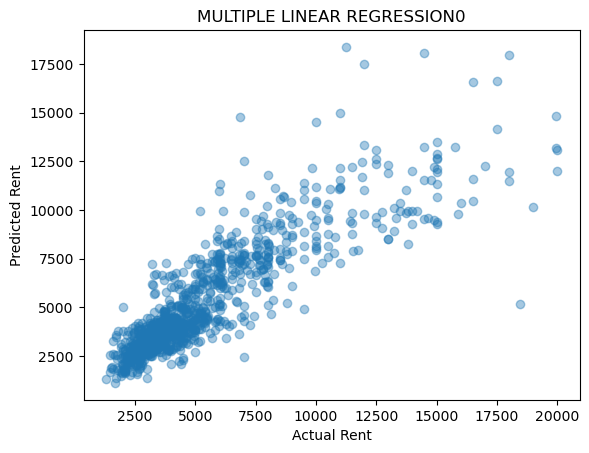

In [169]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predict,alpha = 0.4)
plt.xlabel('Actual Rent') #x축은 실제 주택임대료
plt.ylabel('Predicted Rent') #y축은 데이터를 통해 예측한 주택임대료
plt.title('MULTIPLE LINEAR REGRESSION0')# 다중선형회귀
plt.show() #그래프그려줌

## Dataset 특성 파악

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [171]:
df.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

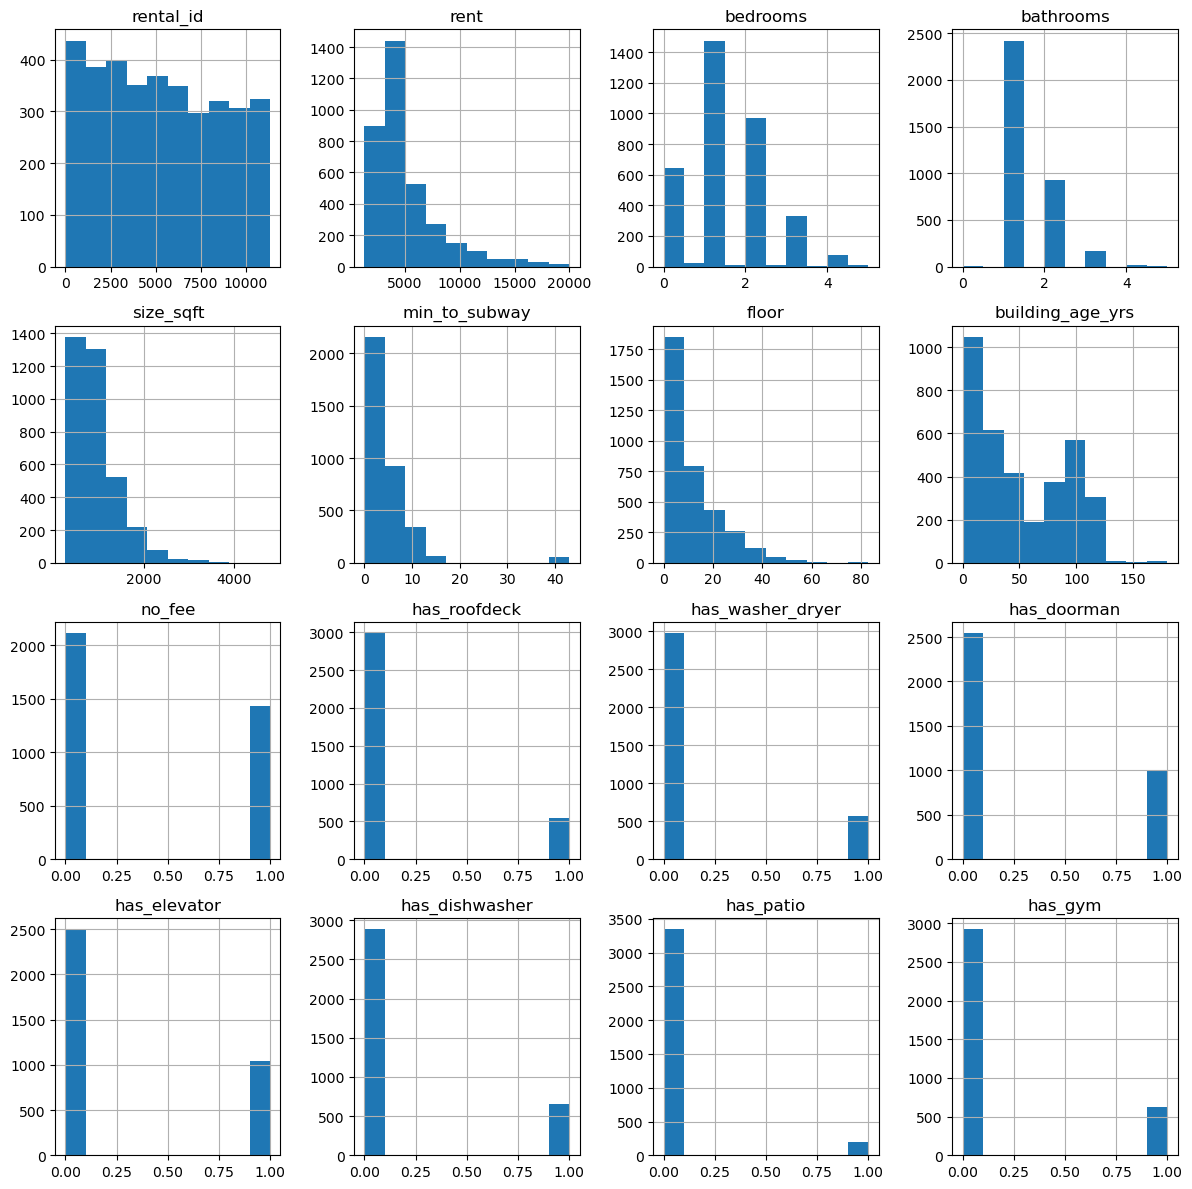

In [172]:
#연속형 변수와 범주형 변수로 구분
df.hist(figsize=(12, 12),bins=10)
plt.tight_layout()  

In [173]:
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


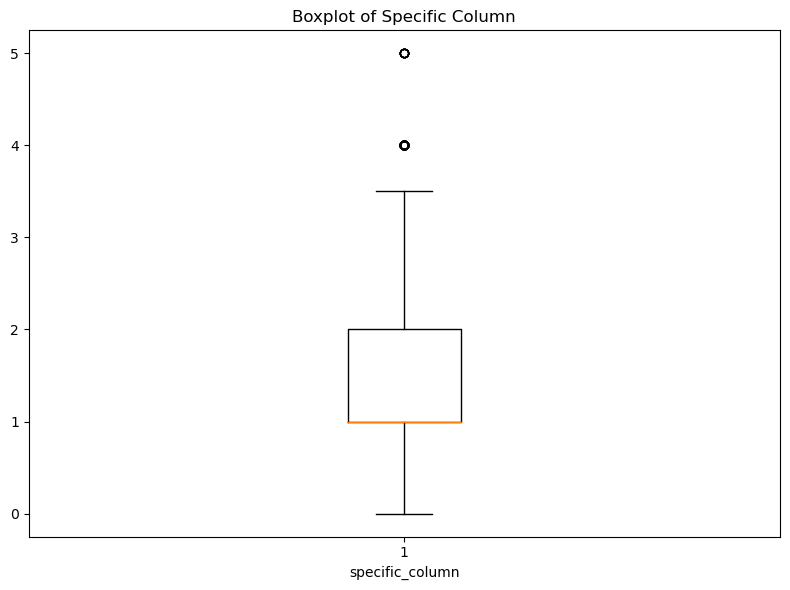

In [174]:
# Assuming df is your DataFrame and 'specific_column' is the column you want to plot
plt.figure(figsize=(8, 6))
plt.title("Boxplot of Specific Column")
plt.boxplot(df['bedrooms'], vert=True)
plt.xlabel("specific_column")
plt.tight_layout()
plt.show()

## Dataset 정규화
모든 입력 변수를 같은 척도로 맞춰서 선형 회귀 모델이 효과적으로 학습하고 예측하는 데 안정성을 높이기 위함. 

In [175]:
from sklearn.preprocessing import MinMaxScaler

df=df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 
        'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 
        'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym','rent']]

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Specify the columns you want to normalize
columns_to_normalize = ['rent','size_sqft', 'min_to_subway', 'floor','building_age_yrs','bedrooms','bathrooms']  # Replace with your desired column names

# Apply Min-Max scaling to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Now, df contains the specified columns normalized between 0 and 1
# You can check the first few rows to verify
print(df.head())

   bedrooms  bathrooms  size_sqft  min_to_subway     floor  building_age_yrs  \
0       0.0        0.2   0.050549       0.209302  0.024096          0.094444   
1       0.4        0.4   0.384615       0.093023  0.012048          0.533333   
2       0.2        0.2   0.146374       0.046512  0.614458          0.161111   
3       0.2        0.2   0.159341       0.069767  0.096386          0.172222   
4       0.4        0.4   1.000000       0.069767  0.048193          0.755556   

   no_fee  has_roofdeck  has_washer_dryer  has_doorman  has_elevator  \
0       1             1                 0            0             1   
1       0             0                 0            0             0   
2       0             1                 0            1             1   
3       0             0                 0            1             1   
4       0             0                 0            1             1   

   has_dishwasher  has_patio  has_gym      rent  
0               1          0        

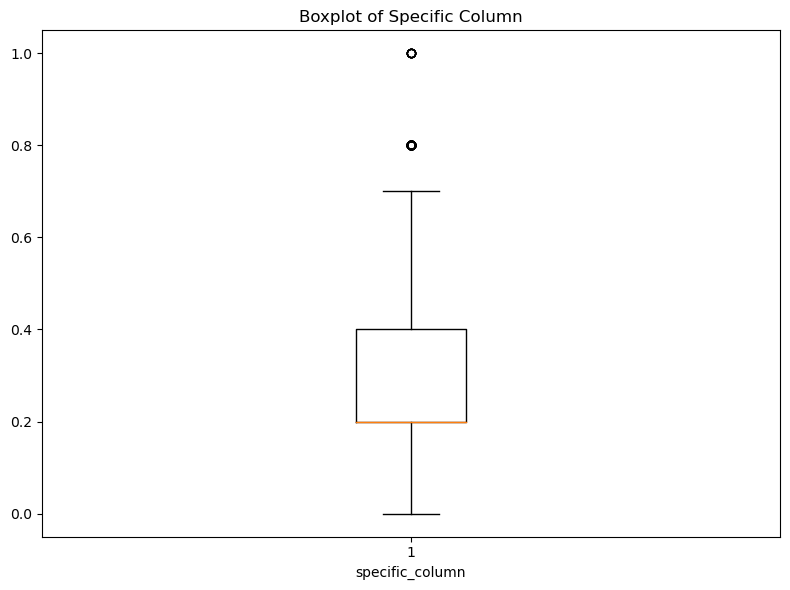

In [176]:
# Assuming df is your DataFrame and 'specific_column' is the column you want to plot
plt.figure(figsize=(8, 6))
plt.title("Boxplot of Specific Column")
plt.boxplot(df['bedrooms'], vert=True)
plt.xlabel("specific_column")
plt.tight_layout()
plt.show()

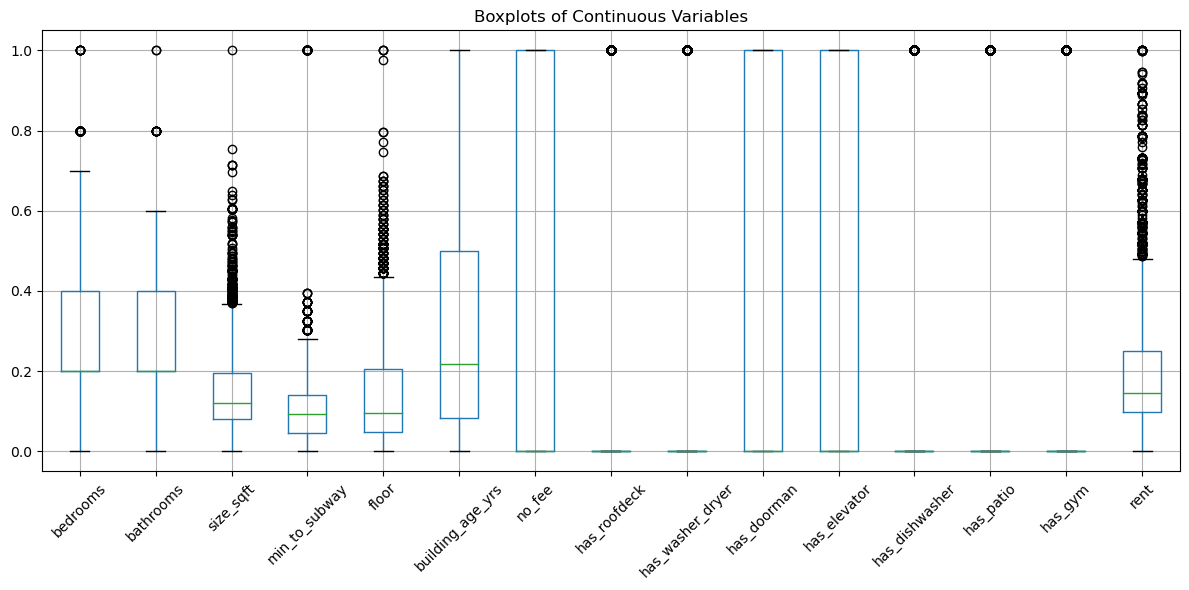

In [177]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df` is your DataFrame with both continuous and categorical variables
# Separate the variables into continuous and categorical
continuous_vars = df.select_dtypes(include=['float64', 'int64'])  # Assuming these are your continuous variables
categorical_vars = df.select_dtypes(include=['object'])  # Assuming these are your categorical variables

# Plot boxplots for continuous variables
plt.figure(figsize=(12, 6))
plt.title("Boxplots of Continuous Variables")
continuous_vars.boxplot(rot=45)
plt.tight_layout()


plt.show()

## 각 칼럼간의 상관계수 파악

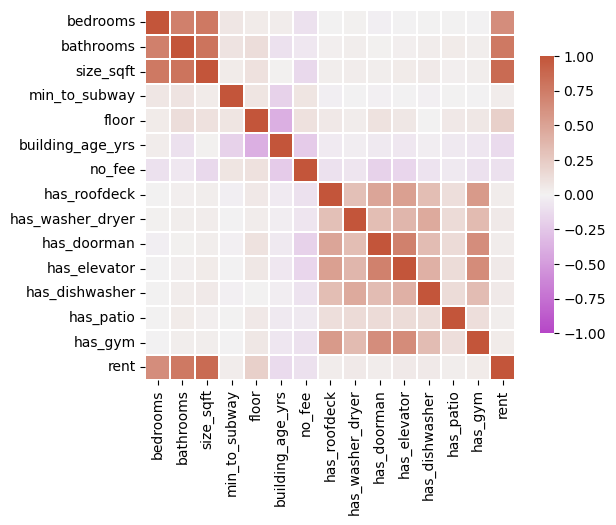

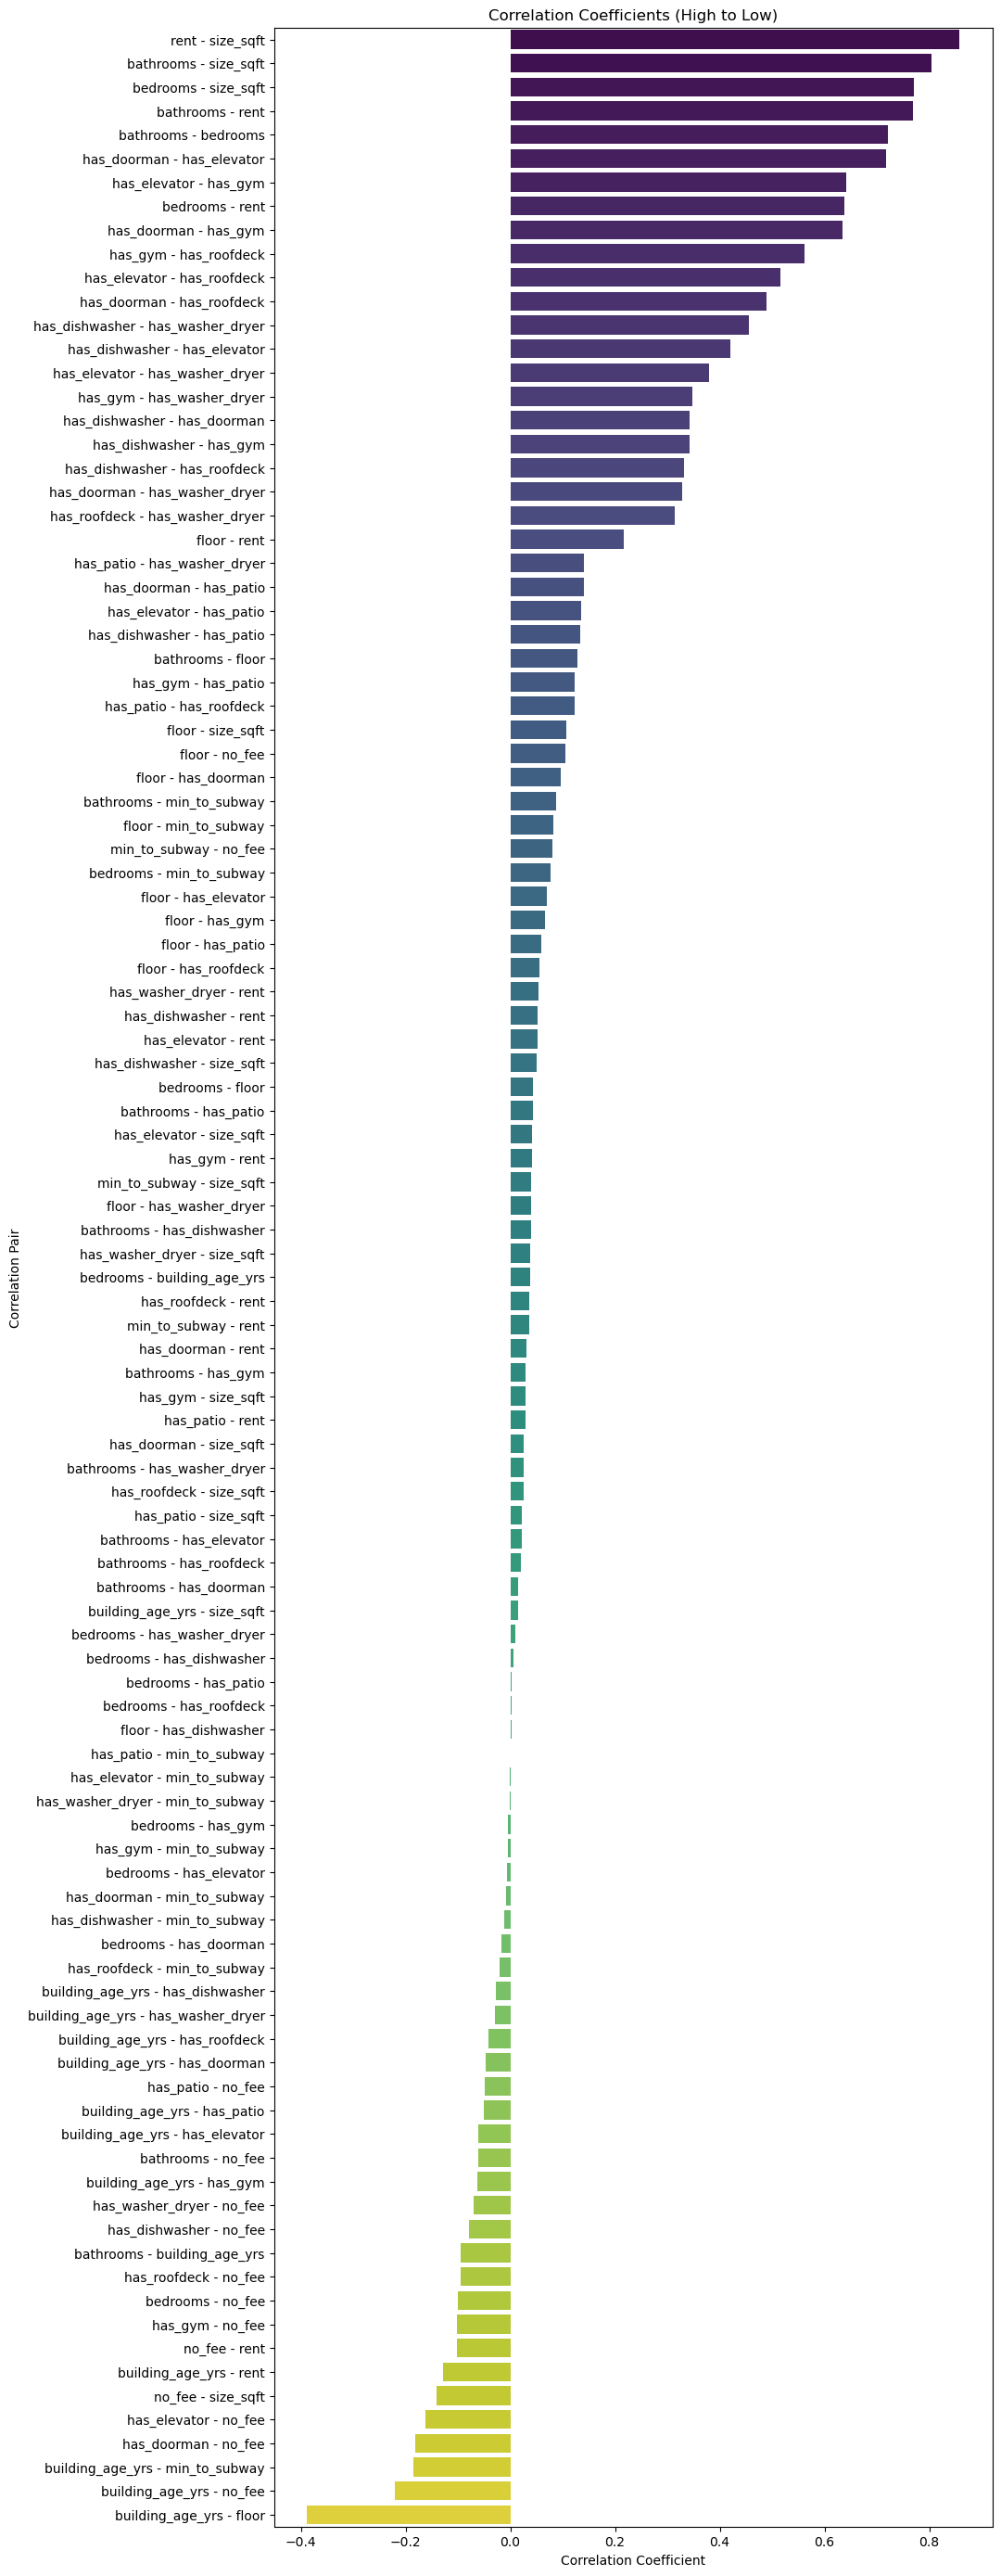

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a nice color map for our heatmap
cmap = sns.diverging_palette(300, 20, as_cmap=True)

# Create a heatmap
sns.heatmap(
    data=df.corr(),  # our correlation matrix
    linewidths=0.2,  # the width of lines separating the matrix squares
    square=True,   # enforce 1:1 ratios among correlation cells
    cmap=cmap,  # use the color map we defined above
    vmax=1,  # define the max of our correlation scale
    vmin=-1,  # define the min of our correlation scale
    center=0,  # The value at which the color map is centered about (white)
    cbar_kws={"shrink": .75}  # shrink the scale a bit
)

# adjust y-axis ticks for legibility
plt.yticks(rotation=0)

# show the heatmap
plt.show()

# Extract unique pairs of correlation coefficients
pairs = df.corr().unstack()

# Filter out pairs where the index levels are the same
pairs = pairs[pairs.index.get_level_values(0) < pairs.index.get_level_values(1)]

# Sort the pairs by correlation coefficient (high to low)
sorted_pairs = pairs.sort_values(ascending=False)

# Reset the index
sorted_pairs = sorted_pairs.reset_index()

# Create a bar plot for sorted_pairs
plt.figure(figsize=(10, 35))
sns.barplot(x=sorted_pairs[0], y=sorted_pairs["level_0"] + ' - ' + sorted_pairs["level_1"], palette="viridis")

# Set labels and title
plt.xlabel("Correlation Coefficient")
plt.ylabel("Correlation Pair")
plt.title("Correlation Coefficients (High to Low)")

# Show the plot
plt.show()

## rent칼럼과 다른 칼럼간의 상관성 파악

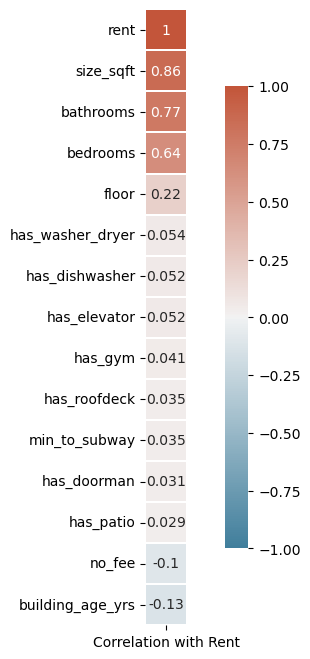

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 관계 매트릭스 계산
correlation_matrix = df.corr()

# 'rent' 칼럼과 다른 모든 칼럼 간의 상관계수 선택 및 정렬
rent_correlations = correlation_matrix['rent'].sort_values(ascending=False)

# 상관 관계를 히트맵으로 표시하기 위한 DataFrame 생성
rent_corr_df = rent_correlations.to_frame()
rent_corr_df.columns = ['Correlation with Rent']

# Define a nice color map for our heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 그림 크기 조정
plt.figure(figsize=(10, 8))  # 가로 10, 세로 8 크기로 설정

# 히트맵 생성
sns.heatmap(
    data=rent_corr_df,  # rent 칼럼과의 상관계수
    annot=True,  # 실제 상관계수 값 표시
    linewidths=0.2,
    square=True,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    cbar_kws={"shrink": .75}
)

# y축 라벨 조정
plt.yticks(rotation=0)

# 히트맵 표시
plt.show()


## Model Construction

### Split Data: Train data,Test Data

In [180]:
import numpy as np

In [181]:

from sklearn.model_selection import train_test_split

x = df[['bedrooms','bathrooms','size_sqft',
        'min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck',
       'has_washer_dryer','has_doorman','has_elevator','has_dishwasher',
       'has_patio','has_gym']] #주택임대료에 영향을 주는 값
y = df[['rent']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2831, 14) (708, 14) (2831, 1) (708, 1)


## Train Model & Select Model

#### Linear Regression Graph

In [182]:
#각 칼럼을 정규화한 후 이상치를 제거하는 것은 데이터의 스케일을 통일하고, 모든 변수가 동일한 중요도를 갖도록 함. 
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

# 이상치 기준을 1에서 10까지 변화시키며 정확도 평가
multipliers = np.linspace(1, 10, 1000)  
accuracies = []

for multiplier in multipliers:
    x_filtered = x_scaled.copy()
    y_filtered = y.copy()
    
    # 정규화된 데이터셋에 대한 이상치 제거
    Q1 = x_filtered.quantile(0.25)
    Q3 = x_filtered.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # 모든 칼럼에 대해 하한과 상한 기준을 적용
    mask = ((x_filtered >= lower_bound) & (x_filtered <= upper_bound)).all(axis=1)
    x_filtered = x_filtered[mask]
    y_filtered = y_filtered[mask]

    # 학습 및 테스트 데이터 분할
    x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_filtered, test_size=0.2, random_state=42)

    # 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(x_train, y_train)

    # 정확도 계산
    accuracy = model.score(x_test, y_test)
    accuracies.append(accuracy)

# 결과 출력
for multiplier, accuracy in zip(multipliers, accuracies):
    print(f'Multiplier: {multiplier:.2f}, Accuracy: {accuracy:.4f}')

Multiplier: 1.00, Accuracy: 0.6348
Multiplier: 1.01, Accuracy: 0.6501
Multiplier: 1.02, Accuracy: 0.6414
Multiplier: 1.03, Accuracy: 0.6414
Multiplier: 1.04, Accuracy: 0.6414
Multiplier: 1.05, Accuracy: 0.6575
Multiplier: 1.05, Accuracy: 0.6575
Multiplier: 1.06, Accuracy: 0.6992
Multiplier: 1.07, Accuracy: 0.7339
Multiplier: 1.08, Accuracy: 0.7090
Multiplier: 1.09, Accuracy: 0.6857
Multiplier: 1.10, Accuracy: 0.6670
Multiplier: 1.11, Accuracy: 0.6167
Multiplier: 1.12, Accuracy: 0.6538
Multiplier: 1.13, Accuracy: 0.6538
Multiplier: 1.14, Accuracy: 0.7076
Multiplier: 1.14, Accuracy: 0.7076
Multiplier: 1.15, Accuracy: 0.6418
Multiplier: 1.16, Accuracy: 0.7046
Multiplier: 1.17, Accuracy: 0.7046
Multiplier: 1.18, Accuracy: 0.7046
Multiplier: 1.19, Accuracy: 0.7188
Multiplier: 1.20, Accuracy: 0.7228
Multiplier: 1.21, Accuracy: 0.7220
Multiplier: 1.22, Accuracy: 0.7220
Multiplier: 1.23, Accuracy: 0.7220
Multiplier: 1.23, Accuracy: 0.6815
Multiplier: 1.24, Accuracy: 0.6736
Multiplier: 1.25, Ac

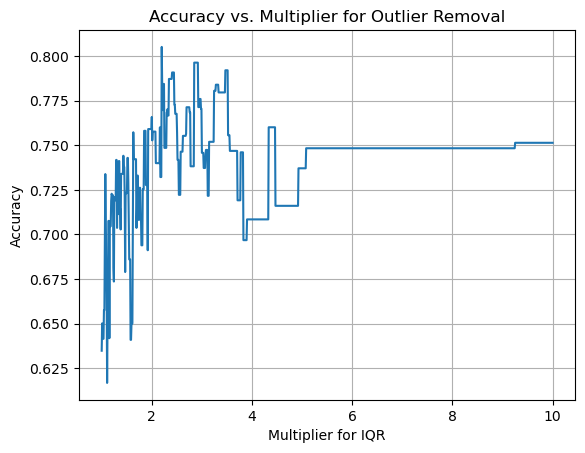

In [183]:
import matplotlib.pyplot as plt
plt.plot(multipliers, accuracies)
plt.xlabel('Multiplier for IQR')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [154]:
# 최대 정확도와 해당하는 multiplier 찾기
max_accuracy = max(accuracies)
max_accuracy_index = accuracies.index(max_accuracy)
best_multiplier = multipliers[max_accuracy_index]

print(f'Best Multiplier: {best_multiplier:.2f}, Highest Accuracy: {max_accuracy:.4f}')


Best Multiplier: 2.20, Highest Accuracy: 0.8052


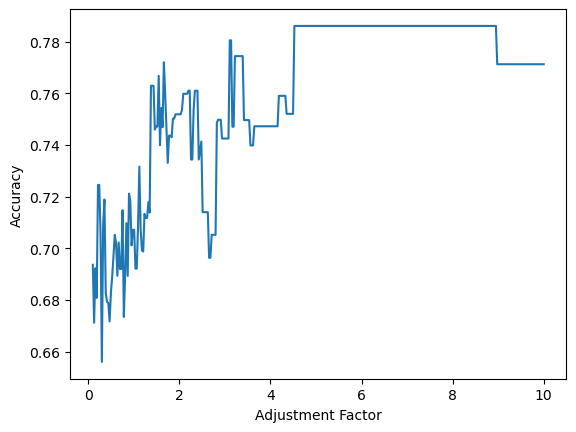

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('./manhattan.csv')

# Prepare original data
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
        'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
        'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df['rent']

# Normalize the features using StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Convert x_normalized back to a DataFrame
x_normalized_df = pd.DataFrame(x_normalized, columns=x.columns)

# Calculate correlations between columns
correlations = x_normalized_df.corr()

# Calculate the average correlation for each column
average_correlations = correlations.mean()

# Preparation to observe changes in accuracy due to adjustment of outlier criteria
adjustment_factors = np.linspace(0.1, 10, 350)  # Example: adjustment_factor from 0.5 to 5 divided into 10 steps
accuracies = []

for adjustment_factor in adjustment_factors:
    # Calculate outlier criteria based on average correlation
    multipliers = {
        column: 1 + (1 - average_correlations[column]) * adjustment_factor
        for column in x_normalized_df.columns
    }

    # Remove outliers
    x_filtered = x_normalized_df.copy()
    y_filtered = y.copy()
    for column in x_filtered.columns:
        Q1 = x_filtered[column].quantile(0.25)
        Q3 = x_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        multiplier = multipliers[column]
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        mask = (x_filtered[column] >= lower_bound) & (x_filtered[column] <= upper_bound)
        x_filtered = x_filtered[mask]
        y_filtered = y_filtered[mask]

    # Check if there are enough data points for splitting
    if len(x_filtered) < 2:
        accuracy = 0.0  # No data points for splitting, set accuracy to 0
    else:
        # Split training and test data
        x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_filtered, test_size=0.3, random_state=200)

        # Train and evaluate linear regression model
        model = LinearRegression()
        model.fit(x_train, y_train)
        accuracy = model.score(x_test, y_test)

    accuracies.append(accuracy)

# Visualize results
plt.plot(adjustment_factors, accuracies)
plt.xlabel('Adjustment Factor')
plt.ylabel('Accuracy')
plt.show()

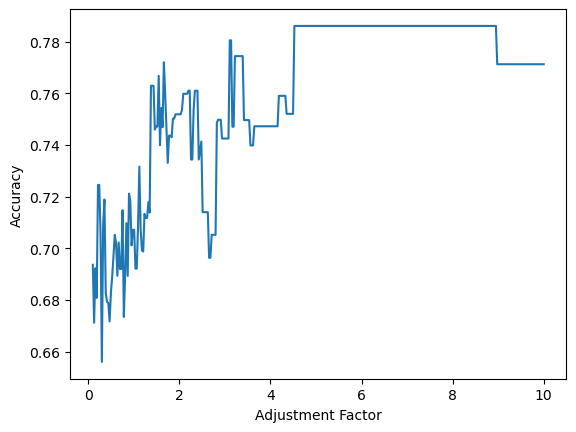

In [232]:
#상관관계를 기반으로 이상치를 조정(상관관계가 높으면 outlier 범위를 낮게하고, 상관관계가 낮으면 outlier를 높게 함.)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('./manhattan.csv')

# Prepare original data
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
        'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
        'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df['rent']

# Normalize the features using StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Convert x_normalized back to a DataFrame
x_normalized_df = pd.DataFrame(x_normalized, columns=x.columns)

# Calculate correlations between columns
correlations = x_normalized_df.corr()

# Calculate the average correlation for each column
average_correlations = correlations.mean()

# Preparation to observe changes in accuracy due to adjustment of outlier criteria
adjustment_factors = np.linspace(0.1, 10, 350)  # Example: adjustment_factor from 0.5 to 5 divided into 10 steps
accuracies = []

for adjustment_factor in adjustment_factors:
    # Calculate outlier criteria based on average correlation
    multipliers = {
        column: 1 + (1 - average_correlations[column]) * adjustment_factor
        for column in x_normalized_df.columns
    }

    # Remove outliers
    x_filtered = x_normalized_df.copy()
    y_filtered = y.copy()
    for column in x_filtered.columns:
        Q1 = x_filtered[column].quantile(0.25)
        Q3 = x_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        multiplier = multipliers[column]
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        mask = (x_filtered[column] >= lower_bound) & (x_filtered[column] <= upper_bound)
        x_filtered = x_filtered[mask]
        y_filtered = y_filtered[mask]

    # Check if there are enough data points for splitting
    if len(x_filtered) < 2:
        accuracy = 0.0  # No data points for splitting, set accuracy to 0
    else:
        # Split training and test data
        x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_filtered, test_size=0.3, random_state=200)

        # Train and evaluate linear regression model
        model = LinearRegression()
        model.fit(x_train, y_train)
        accuracy = model.score(x_test, y_test)

    accuracies.append(accuracy)

# Visualize results
plt.plot(adjustment_factors, accuracies)
plt.xlabel('Adjustment Factor')
plt.ylabel('Accuracy')
plt.show()

In [233]:
# 최대 정확도와 해당하는 조정 계수 찾기
max_accuracy = max(accuracies)
max_accuracy_index = accuracies.index(max_accuracy)
best_adjustment_factor = adjustment_factors[max_accuracy_index]

print("최대 정확도:", max_accuracy)
print("최적의 조정 계수:", best_adjustment_factor)

최대 정확도: 0.786051402915132
최적의 조정 계수: 4.5252148997134665


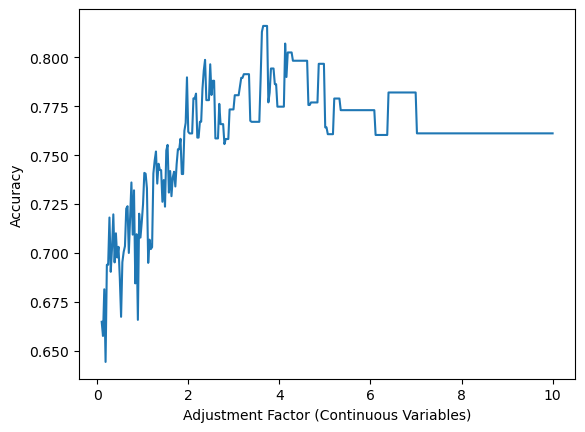

In [230]:
#연속형 변수와 범주형 변수를 구분하여 이상치(outliers) 조정
#연속형 변수에 대해서는 상관관계를 기반으로 이상치를 조정, 범주형 변수에 대해서는 동일한 이상치 조정 계수를 설정합니다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('./manhattan.csv')

# Prepare original data
continuous_columns = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs']
categorical_columns = ['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']

x_continuous = df[continuous_columns]
x_categorical = df[categorical_columns]
y = df['rent']

# Normalize the continuous features using StandardScaler
scaler = StandardScaler()
x_continuous_normalized = scaler.fit_transform(x_continuous)
x_continuous_normalized_df = pd.DataFrame(x_continuous_normalized, columns=continuous_columns)

# Calculate correlations between continuous columns
correlations = x_continuous_normalized_df.corr()

# Calculate the average correlation for each continuous column
average_correlations = correlations.mean()

# Preparation to observe changes in accuracy due to adjustment of outlier criteria
adjustment_factors_continuous = np.linspace(0.1, 10, 350)  # Example: adjustment_factor from 0.5 to 5 divided into 10 steps
adjustment_factor_categorical = 2.0  # Common adjustment factor for categorical columns
accuracies = []

for adjustment_factor in adjustment_factors_continuous:
    # Calculate outlier criteria based on average correlation for continuous columns
    multipliers_continuous = {
        column: 1 + (1 - average_correlations[column]) * adjustment_factor
        for column in x_continuous_normalized_df.columns
    }

    # Apply a common adjustment factor for categorical columns
    multipliers_categorical = {
        column: adjustment_factor_categorical
        for column in x_categorical.columns
    }

    # Merge the multipliers for continuous and categorical columns
    multipliers = {**multipliers_continuous, **multipliers_categorical}

    # Remove outliers
    x_filtered = pd.concat([x_continuous_normalized_df, x_categorical], axis=1)
    y_filtered = y.copy()
    for column in x_filtered.columns:
        if column in continuous_columns:
            Q1 = x_filtered[column].quantile(0.25)
            Q3 = x_filtered[column].quantile(0.75)
            IQR = Q3 - Q1
            multiplier = multipliers[column]
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            mask = (x_filtered[column] >= lower_bound) & (x_filtered[column] <= upper_bound)
            x_filtered = x_filtered[mask]
            y_filtered = y_filtered[mask]

    # Check if there are enough data points for splitting
    if len(x_filtered) < 2:
        accuracy = 0.0  # No data points for splitting, set accuracy to 0
    else:
        # Split training and test data
        x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_filtered, test_size=0.3, random_state=200)

        # Train and evaluate linear regression model
        model = LinearRegression()
        model.fit(x_train, y_train)
        accuracy = model.score(x_test, y_test)

    accuracies.append(accuracy)

# Visualize results
plt.plot(adjustment_factors_continuous, accuracies)
plt.xlabel('Adjustment Factor (Continuous Variables)')
plt.ylabel('Accuracy')
plt.show()


In [231]:
# 최대 정확도와 해당하는 조정 계수 찾기
max_accuracy = max(accuracies)
max_accuracy_index = accuracies.index(max_accuracy)
best_adjustment_factor = adjustment_factors[max_accuracy_index]

print("최대 정확도:", max_accuracy)
print("최적의 조정 계수:", best_adjustment_factor)

최대 정확도: 0.8161493208218651
최적의 조정 계수: 3.6458452722063037


#신경망기반 모델

In [1]:
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
dfna = pd.read_csv("manhattan.csv",encoding="cp949")
dfna
dfna = dfna[['bedrooms','bathrooms','size_sqft',
        'min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck',
       'has_washer_dryer','has_doorman','has_elevator','has_dishwasher',
       'has_patio','has_gym','rent']] #주택임대료에 영향을 주는 값


In [3]:
 #Scikit-Learn의 StandardScaler
scaler = StandardScaler()
scaler.fit(dfna)
dfna_scaled = scaler.transform(dfna)
dfna_scaled = pd.DataFrame(data=dfna_scaled, columns= dfna.columns)
#데이터셋 분할
train_dataset = dfna_scaled.sample(frac=0.7)
test_dataset = dfna_scaled.drop(train_dataset.index)
train_labels = train_dataset.pop('rent')
test_labels = test_dataset.pop('rent')

In [4]:
# 
# Sequential 모델 생성, 두 개의 은닉층으로 구성되며, 각 층은 64개의 유닛과 ReLU 활성화 함수
def bulid_model():
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape=[len(train_dataset.keys())]))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1))
    
    optimizer = keras.optimizers.RMSprop(0.001)
    #(MSE) 손실 함수
    model.compile(loss='mse',
                 optimizer = optimizer,
                 metrics=['mae','mse'])
    return model

In [5]:
model = bulid_model()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(train_dataset, train_labels, epochs= 50, validation_split = 0.3, verbose = 0)

In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
45,0.097746,0.205333,0.097746,0.260348,0.334255,0.260348,45
46,0.097939,0.207915,0.097939,0.260835,0.333610,0.260835,46
47,0.097269,0.209647,0.097269,0.273413,0.350505,0.273413,47
48,0.092865,0.201273,0.092865,0.289970,0.351376,0.289970,48
49,0.091402,0.202215,0.091402,0.254308,0.327284,0.254308,49


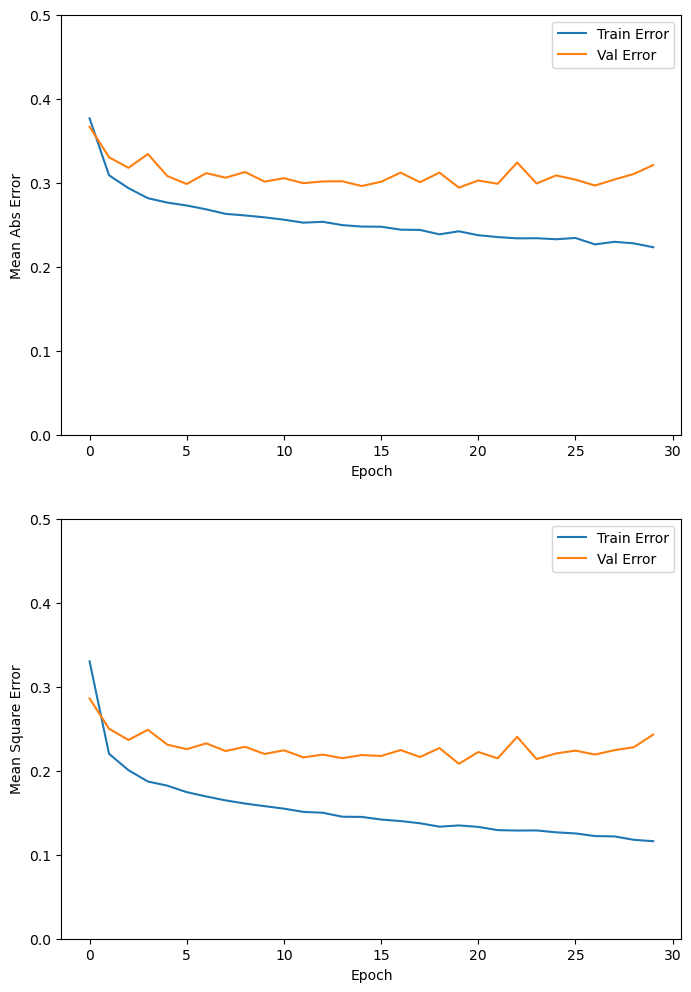

In [14]:
#모델 훈련
import matplotlib.pyplot as plt
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,0.5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,0.5])
    plt.legend()
    plt.show()

plot_history(history)

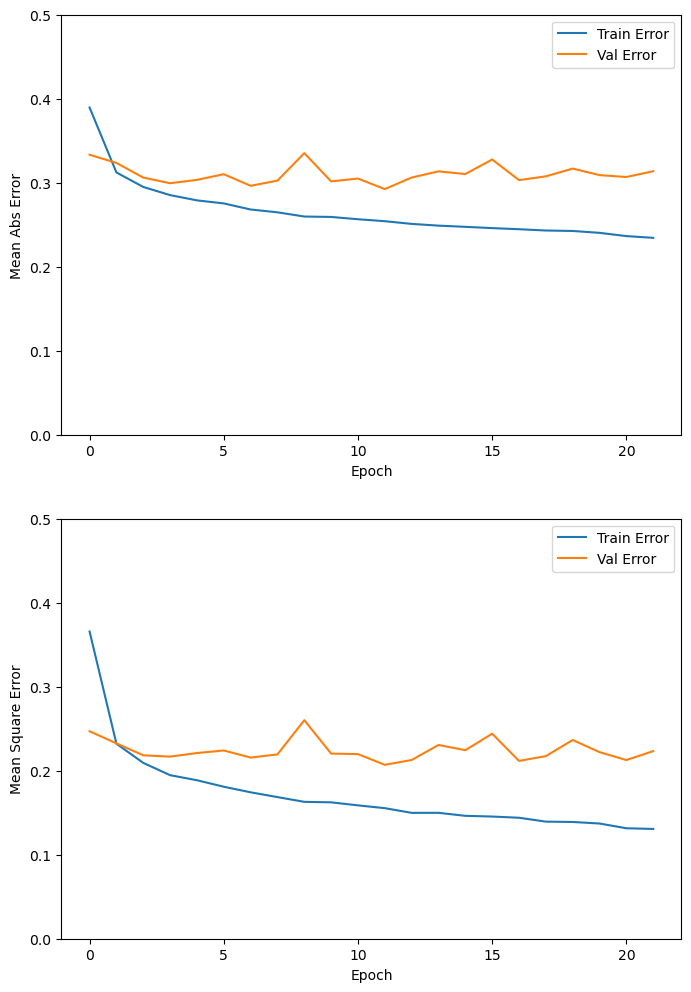

In [16]:
model = bulid_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=30,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

In [17]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f}".format(mae))

34/34 - 0s - loss: 0.2076 - mae: 0.2890 - mse: 0.2076 - 97ms/epoch - 3ms/step
테스트 세트의 평균 절대 오차:  0.29


34/34 [==============================] - 0s 906us/step


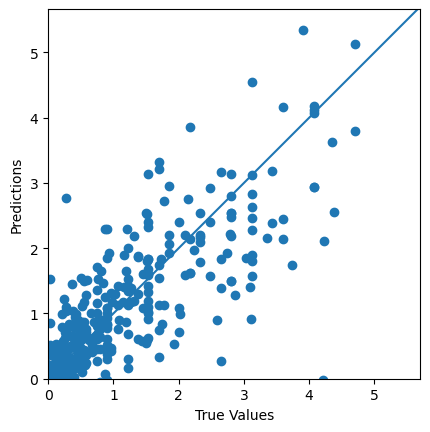

In [18]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-50, 50], [-50, 50])

In [21]:
from sklearn.metrics import r2_score

test_predictions = model.predict(test_dataset).flatten()

r2 = r2_score(test_labels, test_predictions)

print("모델의 정확도 값: {:.4f}".format(r2))

34/34 [==============================] - 0s 1ms/step
모델의 정확도 값: 0.7982


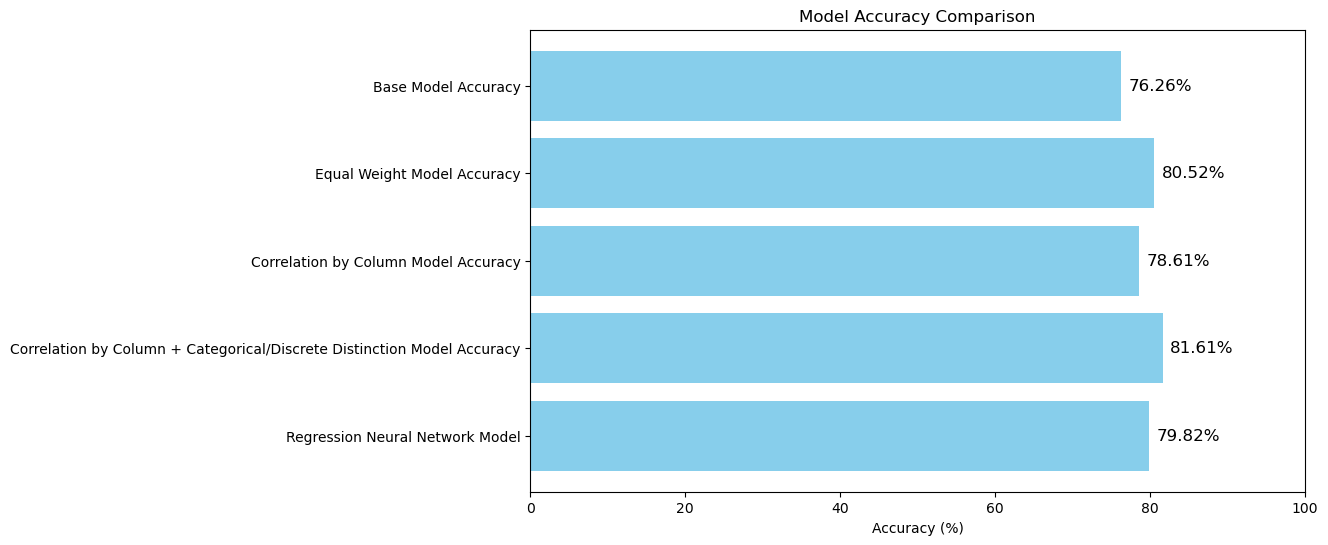

In [22]:
import matplotlib.pyplot as plt

# Accuracy values and corresponding model names
model_names = [
    "Base Model Accuracy",
    "Equal Weight Model Accuracy",
    "Correlation by Column Model Accuracy",
    "Correlation by Column + Categorical/Discrete Distinction Model Accuracy",
    "Regression Neural Network Model"
]

accuracy_values = [76.26, 80.52, 78.61, 81.61,79.82]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_values, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 100)  # Set the x-axis limit to 0-100%

# Display the accuracy values on the bars
for i, v in enumerate(accuracy_values):
    plt.text(v + 1, i, f'{v:.2f}%', va='center', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to display the top-performing model at the top
plt.show()